In [236]:
import sys
import pickle
import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
#from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
#features_list = ['poi','salary', 'from_messages'] # You will need to use more features
features_list = ['poi','salary','bonus']
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
data_dict.pop('TOTAL', 0)
    #pprint.pprint(data_dict)
#for key in data_dict:
#    print key


### Data exploration
### Total number of data points
### Allocation across classes (POI/non-POI)
### Number of features
### Features with missing values?
### Exploratory plots to look for outliers?

### Task 2: Remove outliers

# Remove total from data set
# data_dict.pop('TOTAL', 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [47]:
# Use data_dict to create DataFrame.  
# Transpose to make the rows represent each person in the dictionary.
enron_df = pd.DataFrame(data_dict).T
enron_df

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014
BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,NaN,...,93750,874,False,NaN,NaN,80818,NaN,NaN,860136,1599641
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,144,386,...,NaN,566,False,126027,NaN,231330,2639,7315,969068,126027
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,...,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
BELFER ROBERT,NaN,-102500,NaN,3285,NaN,3285,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,44093,NaN,NaN,NaN,102500,-44093
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,...,NaN,NaN,False,869220,NaN,216582,NaN,NaN,228474,2493616


In [48]:
print enron_df.index.values
print enron_df.ix['LAY KENNETH L']

['ALLEN PHILLIP K' 'BADUM JAMES P' 'BANNANTINE JAMES M' 'BAXTER JOHN C'
 'BAY FRANKLIN R' 'BAZELIDES PHILIP J' 'BECK SALLY W' 'BELDEN TIMOTHY N'
 'BELFER ROBERT' 'BERBERIAN DAVID' 'BERGSIEKER RICHARD P'
 'BHATNAGAR SANJAY' 'BIBI PHILIPPE A' 'BLACHMAN JEREMY M'
 'BLAKE JR. NORMAN P' 'BOWEN JR RAYMOND M' 'BROWN MICHAEL'
 'BUCHANAN HAROLD G' 'BUTTS ROBERT H' 'BUY RICHARD B'
 'CALGER CHRISTOPHER F' 'CARTER REBECCA C' 'CAUSEY RICHARD A' 'CHAN RONNIE'
 'CHRISTODOULOU DIOMEDES' 'CLINE KENNETH W' 'COLWELL WESLEY'
 'CORDES WILLIAM R' 'COX DAVID' 'CUMBERLAND MICHAEL S' 'DEFFNER JOSEPH M'
 'DELAINEY DAVID W' 'DERRICK JR. JAMES V' 'DETMERING TIMOTHY J'
 'DIETRICH JANET R' 'DIMICHELE RICHARD G' 'DODSON KEITH'
 'DONAHUE JR JEFFREY M' 'DUNCAN JOHN H' 'DURAN WILLIAM D' 'ECHOLS JOHN B'
 'ELLIOTT STEVEN' 'FALLON JAMES B' 'FASTOW ANDREW S' 'FITZGERALD JAY L'
 'FOWLER PEGGY' 'FOY JOE' 'FREVERT MARK A' 'FUGH JOHN L' 'GAHN ROBERT S'
 'GARLAND C KEVIN' 'GATHMANN WILLIAM D' 'GIBBS DANA R' 'GILLIS JOHN'
 'GLIS

In [49]:
enron_df.replace(to_replace = 'NaN', value = 0.0)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,0.0,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,...,304805.0,152.0,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BADUM JAMES P,0.0,178980.0,0.0,0.0,0,257817.0,3486.0,0.0,0.0,0.0,...,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,182466.0,257817.0
BANNANTINE JAMES M,0.0,0.0,-5104.0,0.0,james.bannantine@enron.com,4046157.0,56301.0,29.0,39.0,0.0,...,0.0,864523.0,False,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,0.0,0,6680544.0,11200.0,0.0,0.0,0.0,...,1586055.0,2660303.0,False,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,260455.0,-201641.0,0.0,frank.bay@enron.com,0.0,129142.0,0.0,0.0,0.0,...,0.0,69.0,False,145796.0,-82782.0,239671.0,0.0,0.0,827696.0,63014.0
BAZELIDES PHILIP J,0.0,684694.0,0.0,0.0,0,1599641.0,0.0,0.0,0.0,0.0,...,93750.0,874.0,False,0.0,0.0,80818.0,0.0,0.0,860136.0,1599641.0
BECK SALLY W,700000.0,0.0,0.0,0.0,sally.beck@enron.com,0.0,37172.0,4343.0,144.0,386.0,...,0.0,566.0,False,126027.0,0.0,231330.0,2639.0,7315.0,969068.0,126027.0
BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,0.0,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,...,0.0,210698.0,True,157569.0,0.0,213999.0,5521.0,7991.0,5501630.0,1110705.0
BELFER ROBERT,0.0,-102500.0,0.0,3285.0,0,3285.0,0.0,0.0,0.0,0.0,...,0.0,0.0,False,0.0,44093.0,0.0,0.0,0.0,102500.0,-44093.0
BERBERIAN DAVID,0.0,0.0,0.0,0.0,david.berberian@enron.com,1624396.0,11892.0,0.0,0.0,0.0,...,0.0,0.0,False,869220.0,0.0,216582.0,0.0,0.0,228474.0,2493616.0


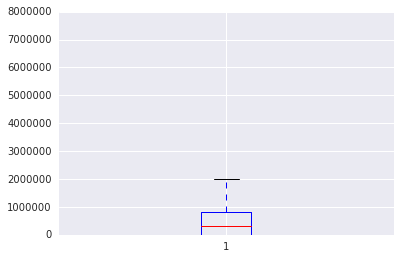

In [237]:
plt.boxplot(enron_df['bonus'].astype(float).fillna(0))
plt.show()

In [140]:
enron_df['bonus'][enron_df['bonus'] > 2000000]

ALLEN PHILLIP K                  4175000
BADUM JAMES P                        NaN
BANNANTINE JAMES M                   NaN
BAZELIDES PHILIP J                   NaN
BELDEN TIMOTHY N                 5249999
BELFER ROBERT                        NaN
BERBERIAN DAVID                      NaN
BHATNAGAR SANJAY                     NaN
BLAKE JR. NORMAN P                   NaN
BROWN MICHAEL                        NaN
CHAN RONNIE                          NaN
CHRISTODOULOU DIOMEDES               NaN
CLINE KENNETH W                      NaN
CORDES WILLIAM R                     NaN
DELAINEY DAVID W                 3000000
DUNCAN JOHN H                        NaN
FALLON JAMES B                   2500000
FOWLER PEGGY                         NaN
FOY JOE                              NaN
FUGH JOHN L                          NaN
GATHMANN WILLIAM D                   NaN
GIBBS DANA R                         NaN
GILLIS JOHN                          NaN
GRAMM WENDY L                        NaN
GRAY RODNEY     

In [139]:
 enron_df[(enron_df['bonus'] > 2000000).bool and enron_df['poi']]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,...,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
BOWEN JR RAYMOND M,1350000,NaN,-833,NaN,raymond.bowen@enron.com,NaN,65907,27,140,15,...,974293,1621,True,252055,NaN,278601,1593,1858,2669589,252055
CALGER CHRISTOPHER F,1250000,NaN,-262500,NaN,christopher.calger@enron.com,NaN,35818,144,199,25,...,375304,486,True,126027,NaN,240189,2188,2598,1639297,126027
CAUSEY RICHARD A,1000000,NaN,-235000,NaN,richard.causey@enron.com,NaN,30674,49,58,12,...,350000,307895,True,2502063,NaN,415189,1585,1892,1868758,2502063
COLWELL WESLEY,1200000,27610,-144062,NaN,wes.colwell@enron.com,NaN,16514,40,240,11,...,NaN,101740,True,698242,NaN,288542,1132,1758,1490344,698242
DELAINEY DAVID W,3000000,NaN,NaN,NaN,david.delainey@enron.com,2291113,86174,3069,66,609,...,1294981,1661,True,1323148,NaN,365163,2097,3093,4747979,3614261
FASTOW ANDREW S,1300000,NaN,-1386055,NaN,andrew.fastow@enron.com,NaN,55921,NaN,NaN,NaN,...,1736055,277464,True,1794412,NaN,440698,NaN,NaN,2424083,1794412
GLISAN JR BEN F,600000,NaN,NaN,NaN,ben.glisan@enron.com,384728,125978,16,52,6,...,71023,200308,True,393818,NaN,274975,874,873,1272284,778546
HANNON KEVIN P,1500000,NaN,-3117011,NaN,kevin.hannon@enron.com,5538001,34039,32,32,21,...,1617011,11350,True,853064,NaN,243293,1035,1045,288682,6391065
HIRKO JOSEPH,NaN,10259,NaN,NaN,joe.hirko@enron.com,30766064,77978,NaN,NaN,NaN,...,NaN,2856,True,NaN,NaN,NaN,NaN,NaN,91093,30766064


In [149]:
type(enron_df.loc['SHELBY REX']['deferral_payments'])

str

In [150]:
type(enron_df.loc['BELDEN TIMOTHY N']['deferral_payments'])

int

In [198]:
non_number_columns = ['email_address', 'poi']
enron_df_converted = pd.DataFrame()
for column in enron_df.columns.values:
    if column not in non_number_columns:
        enron_df_converted[column] = enron_df[column].astype(float)
    else:
        enron_df_converted[column] = enron_df[column]
enron_df_converted

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,NaN,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,...,304805.0,152.0,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BADUM JAMES P,NaN,178980.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466.0,257817.0
BANNANTINE JAMES M,NaN,NaN,-5104.0,NaN,james.bannantine@enron.com,4046157.0,56301.0,29.0,39.0,0.0,...,NaN,864523.0,False,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,NaN,...,1586055.0,2660303.0,False,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,260455.0,-201641.0,NaN,frank.bay@enron.com,NaN,129142.0,NaN,NaN,NaN,...,NaN,69.0,False,145796.0,-82782.0,239671.0,NaN,NaN,827696.0,63014.0
BAZELIDES PHILIP J,NaN,684694.0,NaN,NaN,NaN,1599641.0,NaN,NaN,NaN,NaN,...,93750.0,874.0,False,NaN,NaN,80818.0,NaN,NaN,860136.0,1599641.0
BECK SALLY W,700000.0,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172.0,4343.0,144.0,386.0,...,NaN,566.0,False,126027.0,NaN,231330.0,2639.0,7315.0,969068.0,126027.0
BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,...,NaN,210698.0,True,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0
BELFER ROBERT,NaN,-102500.0,NaN,3285.0,NaN,3285.0,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,44093.0,NaN,NaN,NaN,102500.0,-44093.0
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396.0,11892.0,NaN,NaN,NaN,...,NaN,NaN,False,869220.0,NaN,216582.0,NaN,NaN,228474.0,2493616.0


In [200]:
enron_df_converted = enron_df_converted.fillna(0)

In [163]:
enron_df_converted

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,0.0,1729541.0,13868.0,2195.0,47.0,65.0,0.0,304805.0,152.0,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BADUM JAMES P,0.0,178980.0,0.0,0.0,257817.0,3486.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,182466.0,257817.0
BANNANTINE JAMES M,0.0,0.0,-5104.0,0.0,4046157.0,56301.0,29.0,39.0,0.0,0.0,0.0,864523.0,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,0.0,6680544.0,11200.0,0.0,0.0,0.0,0.0,1586055.0,2660303.0,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,260455.0,-201641.0,0.0,0.0,129142.0,0.0,0.0,0.0,0.0,0.0,69.0,145796.0,-82782.0,239671.0,0.0,0.0,827696.0,63014.0
BAZELIDES PHILIP J,0.0,684694.0,0.0,0.0,1599641.0,0.0,0.0,0.0,0.0,0.0,93750.0,874.0,0.0,0.0,80818.0,0.0,0.0,860136.0,1599641.0
BECK SALLY W,700000.0,0.0,0.0,0.0,0.0,37172.0,4343.0,144.0,386.0,0.0,0.0,566.0,126027.0,0.0,231330.0,2639.0,7315.0,969068.0,126027.0
BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,0.0,953136.0,17355.0,484.0,228.0,108.0,0.0,0.0,210698.0,157569.0,0.0,213999.0,5521.0,7991.0,5501630.0,1110705.0
BELFER ROBERT,0.0,-102500.0,0.0,3285.0,3285.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44093.0,0.0,0.0,0.0,102500.0,-44093.0
BERBERIAN DAVID,0.0,0.0,0.0,0.0,1624396.0,11892.0,0.0,0.0,0.0,0.0,0.0,0.0,869220.0,0.0,216582.0,0.0,0.0,228474.0,2493616.0


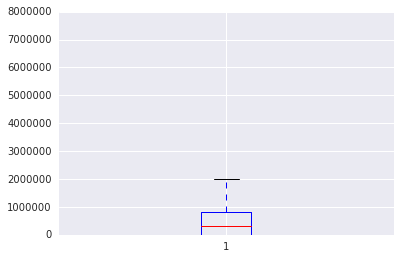

In [238]:
plt.boxplot(enron_df_converted['bonus'])
plt.show()

In [201]:
enron_df_converted[(enron_df_converted['bonus'] > 2000000).bool and enron_df_converted['poi']]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,0.0,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,...,0.0,210698.0,True,157569.0,0.0,213999.0,5521.0,7991.0,5501630.0,1110705.0
BOWEN JR RAYMOND M,1350000.0,0.0,-833.0,0.0,raymond.bowen@enron.com,0.0,65907.0,27.0,140.0,15.0,...,974293.0,1621.0,True,252055.0,0.0,278601.0,1593.0,1858.0,2669589.0,252055.0
CALGER CHRISTOPHER F,1250000.0,0.0,-262500.0,0.0,christopher.calger@enron.com,0.0,35818.0,144.0,199.0,25.0,...,375304.0,486.0,True,126027.0,0.0,240189.0,2188.0,2598.0,1639297.0,126027.0
CAUSEY RICHARD A,1000000.0,0.0,-235000.0,0.0,richard.causey@enron.com,0.0,30674.0,49.0,58.0,12.0,...,350000.0,307895.0,True,2502063.0,0.0,415189.0,1585.0,1892.0,1868758.0,2502063.0
COLWELL WESLEY,1200000.0,27610.0,-144062.0,0.0,wes.colwell@enron.com,0.0,16514.0,40.0,240.0,11.0,...,0.0,101740.0,True,698242.0,0.0,288542.0,1132.0,1758.0,1490344.0,698242.0
DELAINEY DAVID W,3000000.0,0.0,0.0,0.0,david.delainey@enron.com,2291113.0,86174.0,3069.0,66.0,609.0,...,1294981.0,1661.0,True,1323148.0,0.0,365163.0,2097.0,3093.0,4747979.0,3614261.0
FASTOW ANDREW S,1300000.0,0.0,-1386055.0,0.0,andrew.fastow@enron.com,0.0,55921.0,0.0,0.0,0.0,...,1736055.0,277464.0,True,1794412.0,0.0,440698.0,0.0,0.0,2424083.0,1794412.0
GLISAN JR BEN F,600000.0,0.0,0.0,0.0,ben.glisan@enron.com,384728.0,125978.0,16.0,52.0,6.0,...,71023.0,200308.0,True,393818.0,0.0,274975.0,874.0,873.0,1272284.0,778546.0
HANNON KEVIN P,1500000.0,0.0,-3117011.0,0.0,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,21.0,...,1617011.0,11350.0,True,853064.0,0.0,243293.0,1035.0,1045.0,288682.0,6391065.0
HIRKO JOSEPH,0.0,10259.0,0.0,0.0,joe.hirko@enron.com,30766064.0,77978.0,0.0,0.0,0.0,...,0.0,2856.0,True,0.0,0.0,0.0,0.0,0.0,91093.0,30766064.0


In [174]:
enron_df_converted[enron_df_converted['bonus'] > 2000000 and enron_df['poi']]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [193]:
((enron_df_converted['bonus'] > 2000000).bool)

<bound method Series.bool of ALLEN PHILLIP K                   True
BADUM JAMES P                    False
BANNANTINE JAMES M               False
BAXTER JOHN C                    False
BAY FRANKLIN R                   False
BAZELIDES PHILIP J               False
BECK SALLY W                     False
BELDEN TIMOTHY N                  True
BELFER ROBERT                    False
BERBERIAN DAVID                  False
BERGSIEKER RICHARD P             False
BHATNAGAR SANJAY                 False
BIBI PHILIPPE A                  False
BLACHMAN JEREMY M                False
BLAKE JR. NORMAN P               False
BOWEN JR RAYMOND M               False
BROWN MICHAEL                    False
BUCHANAN HAROLD G                False
BUTTS ROBERT H                   False
BUY RICHARD B                    False
CALGER CHRISTOPHER F             False
CARTER REBECCA C                 False
CAUSEY RICHARD A                 False
CHAN RONNIE                      False
CHRISTODOULOU DIOMEDES           Fa

In [207]:
enron_df_converted[enron_df_converted['poi'] and (enron_df_converted['bonus'] > 2000000)]

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [209]:
enron_df_converted[(enron_df_converted['bonus'] > 2000000)][enron_df_converted['poi']]

C:\Users\Michael\Anaconda2\envs\py27\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,0.0,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,...,0.0,210698.0,True,157569.0,0.0,213999.0,5521.0,7991.0,5501630.0,1110705.0
DELAINEY DAVID W,3000000.0,0.0,0.0,0.0,david.delainey@enron.com,2291113.0,86174.0,3069.0,66.0,609.0,...,1294981.0,1661.0,True,1323148.0,0.0,365163.0,2097.0,3093.0,4747979.0,3614261.0
LAY KENNETH L,7000000.0,202911.0,-300000.0,0.0,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,16.0,...,3600000.0,10359729.0,True,14761694.0,0.0,1072321.0,2411.0,4273.0,103559793.0,49110078.0
SKILLING JEFFREY K,5600000.0,0.0,0.0,0.0,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,...,1920000.0,22122.0,True,6843672.0,0.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0


In [211]:
enron_df_converted[(enron_df_converted['bonus'] > 2500000)]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,0.0,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,...,304805.0,152.0,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,0.0,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,...,0.0,210698.0,True,157569.0,0.0,213999.0,5521.0,7991.0,5501630.0,1110705.0
DELAINEY DAVID W,3000000.0,0.0,0.0,0.0,david.delainey@enron.com,2291113.0,86174.0,3069.0,66.0,609.0,...,1294981.0,1661.0,True,1323148.0,0.0,365163.0,2097.0,3093.0,4747979.0,3614261.0
KITCHEN LOUISE,3100000.0,0.0,0.0,0.0,louise.kitchen@enron.com,81042.0,5774.0,1728.0,251.0,194.0,...,0.0,93925.0,False,466101.0,0.0,271442.0,3669.0,8305.0,3471141.0,547143.0
LAVORATO JOHN J,8000000.0,0.0,0.0,0.0,john.lavorato@enron.com,4158995.0,49537.0,2585.0,528.0,411.0,...,2035380.0,1552.0,False,1008149.0,0.0,339288.0,3962.0,7259.0,10425757.0,5167144.0
LAY KENNETH L,7000000.0,202911.0,-300000.0,0.0,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,16.0,...,3600000.0,10359729.0,True,14761694.0,0.0,1072321.0,2411.0,4273.0,103559793.0,49110078.0
MCMAHON JEFFREY,2600000.0,0.0,0.0,0.0,jeffrey.mcmahon@enron.com,1104054.0,137108.0,48.0,58.0,26.0,...,694862.0,297353.0,False,558801.0,0.0,370448.0,2228.0,2355.0,4099771.0,1662855.0
SKILLING JEFFREY K,5600000.0,0.0,0.0,0.0,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,...,1920000.0,22122.0,True,6843672.0,0.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0
WHALLEY LAWRENCE G,3000000.0,0.0,0.0,0.0,greg.whalley@enron.com,3282960.0,57838.0,556.0,186.0,24.0,...,808346.0,301026.0,False,2796177.0,0.0,510364.0,3920.0,6019.0,4677574.0,6079137.0


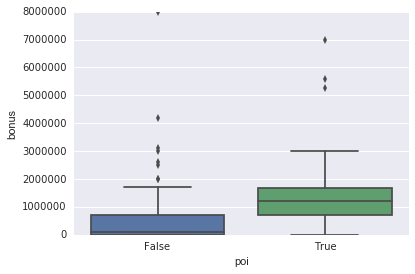

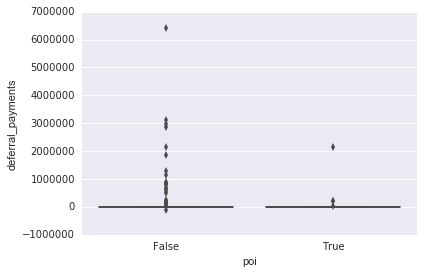

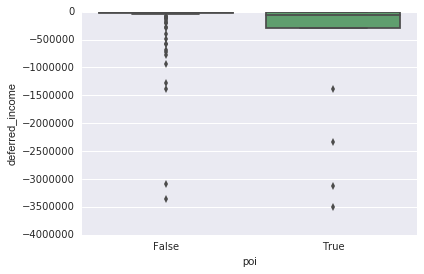

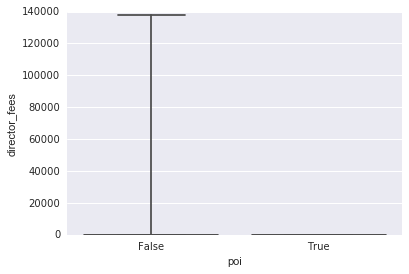

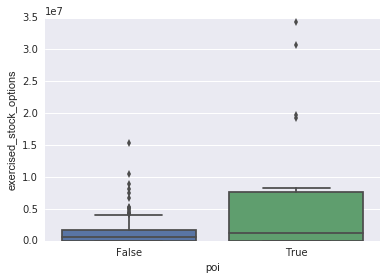

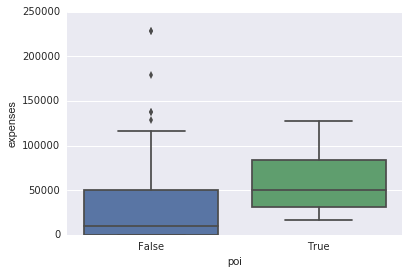

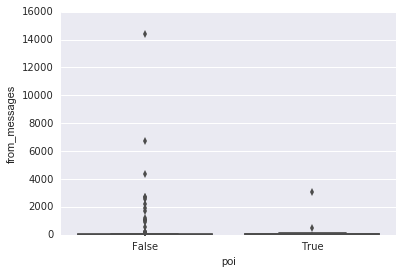

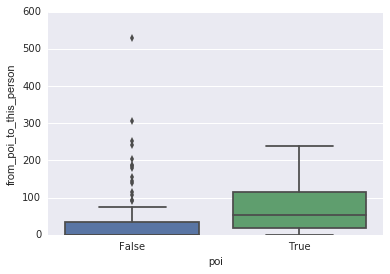

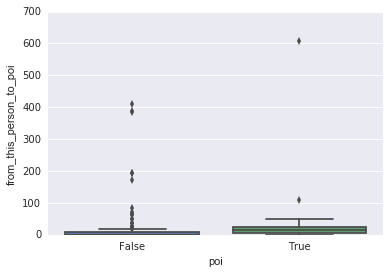

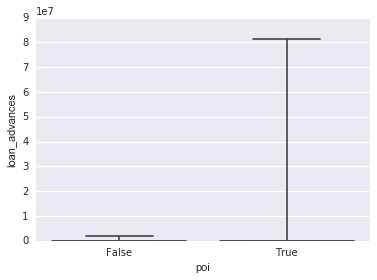

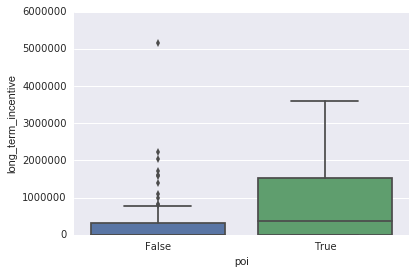

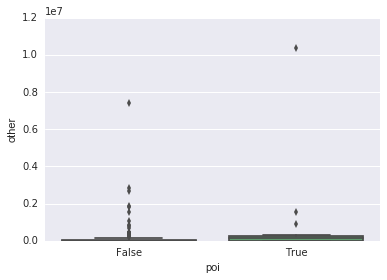

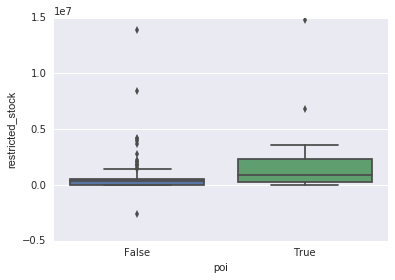

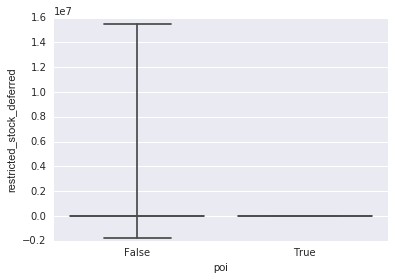

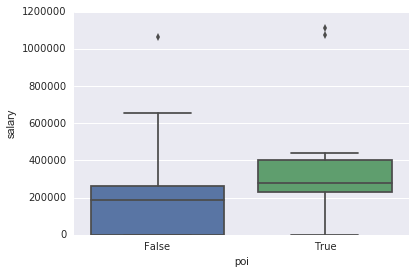

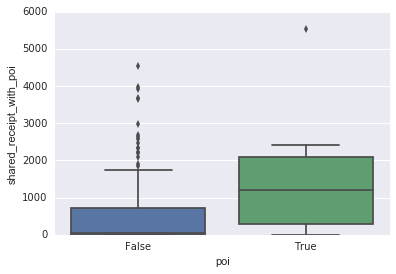

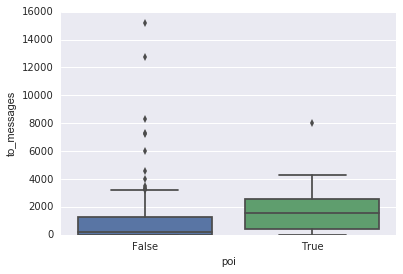

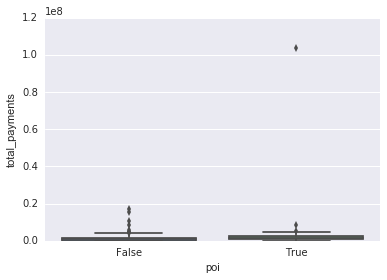

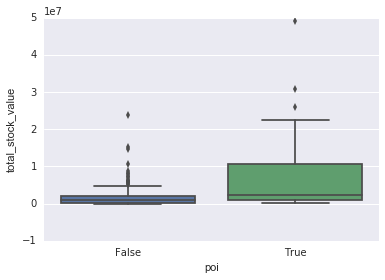

In [253]:
# Compare distributions of non-POIs and POIs for each of the numerical columns

for column in enron_df_converted.columns.values:
    if column not in non_number_columns:
        #sns.boxplot(enron_df_converted[column])
        #sns.title(column)
        sns.boxplot(x = 'poi', y = column, data = enron_df_converted)
        plt.show()

In [232]:
enron_df_converted[enron_df_converted['deferral_payments'] > 1000000][['deferral_payments','poi']]

,deferral_payments,poi
ALLEN PHILLIP K,2869717.0,False
BAXTER JOHN C,1295738.0,False
BELDEN TIMOTHY N,2144013.0,True
FREVERT MARK A,6426990.0,False
HAEDICKE MARK E,2157527.0,False
HORTON STANLEY C,3131860.0,False
HUMPHREY GENE E,2964506.0,False
MEYER ROCKFORD G,1848227.0,False
PIPER GREGORY F,1130036.0,False


In [234]:
enron_df_converted[enron_df_converted['deferred_income'] < -1000000][['deferred_income','poi']]

,deferred_income,poi
ALLEN PHILLIP K,-3081055.0,False
BAXTER JOHN C,-1386055.0,False
BELDEN TIMOTHY N,-2334434.0,True
DERRICK JR. JAMES V,-1284000.0,False
FASTOW ANDREW S,-1386055.0,True
FREVERT MARK A,-3367011.0,False
HANNON KEVIN P,-3117011.0,True
RICE KENNETH D,-3504386.0,True


In [243]:
enron_df_converted[enron_df_converted['director_fees'] > 0][['director_fees','poi']]

,director_fees,poi
BELFER ROBERT,3285.0,False
BHATNAGAR SANJAY,137864.0,False
BLAKE JR. NORMAN P,113784.0,False
CHAN RONNIE,98784.0,False
DUNCAN JOHN H,102492.0,False
GRAMM WENDY L,119292.0,False
JAEDICKE ROBERT,108750.0,False
LEMAISTRE CHARLES,112492.0,False
MENDELSOHN JOHN,103750.0,False
MEYER JEROME J,38346.0,False


In [246]:
enron_df_converted[['exercised_stock_options', 'poi']]

,exercised_stock_options,poi
ALLEN PHILLIP K,1729541.0,False
BADUM JAMES P,257817.0,False
BANNANTINE JAMES M,4046157.0,False
BAXTER JOHN C,6680544.0,False
BAY FRANKLIN R,0.0,False
BAZELIDES PHILIP J,1599641.0,False
BECK SALLY W,0.0,False
BELDEN TIMOTHY N,953136.0,True
BELFER ROBERT,3285.0,False
BERBERIAN DAVID,1624396.0,False


In [229]:
enron_df_converted[enron_df_converted['loan_advances'] > 0][['loan_advances','poi']]

,loan_advances,poi
FREVERT MARK A,2000000.0,False
LAY KENNETH L,81525000.0,True
PICKERING MARK R,400000.0,False


In [259]:
enron_df_converted['bonus'].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

ALLEN PHILLIP K                 NaN
BADUM JAMES P                   NaN
BANNANTINE JAMES M              NaN
BAXTER JOHN C                   NaN
BAY FRANKLIN R                  NaN
BAZELIDES PHILIP J              NaN
BECK SALLY W                    NaN
BELDEN TIMOTHY N                NaN
BELFER ROBERT                   NaN
BERBERIAN DAVID                 NaN
BERGSIEKER RICHARD P            NaN
BHATNAGAR SANJAY                NaN
BIBI PHILIPPE A                 NaN
BLACHMAN JEREMY M               NaN
BLAKE JR. NORMAN P              NaN
BOWEN JR RAYMOND M              NaN
BROWN MICHAEL                   NaN
BUCHANAN HAROLD G               NaN
BUTTS ROBERT H                  NaN
BUY RICHARD B                   NaN
CALGER CHRISTOPHER F            NaN
CARTER REBECCA C                NaN
CAUSEY RICHARD A                NaN
CHAN RONNIE                     NaN
CHRISTODOULOU DIOMEDES          NaN
CLINE KENNETH W                 NaN
COLWELL WESLEY                  NaN
CORDES WILLIAM R            

In [258]:
np.max(enron_df_converted['bonus'])

8000000.0

In [272]:
#enron_df_converted['bonus'].apply(lambda x: (np.min(x)))

(enron_df_converted['bonus'] - enron_df_converted['bonus'].min()) / \
(enron_df_converted['bonus'].max() - enron_df_converted['bonus'].min())

enron_df_norm = pd.DataFrame()
for column in enron_df.columns.values:
    if column not in non_number_columns:
        enron_df_norm[column] = (enron_df_converted[column] - enron_df_converted[column].min()) / \
                                (enron_df_converted[column].max() - enron_df_converted[column].min())
    else:
        enron_df_norm[column] = enron_df_converted[column]
enron_df_norm

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,0.521875,0.455199,0.120800,0.000000,phillip.allen@enron.com,0.050353,0.060622,0.152770,0.089015,0.106732,...,0.059238,1.467220e-05,False,0.157232,0.096346,0.181735,0.254845,0.191564,0.043303,0.036083
BADUM JAMES P,0.000000,0.043109,1.000000,0.000000,NaN,0.007506,0.015238,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,False,0.149975,0.103654,0.000000,0.000000,0.000000,0.001762,0.006142
BANNANTINE JAMES M,0.000000,0.015698,0.998544,0.000000,james.bannantine@enron.com,0.117798,0.246111,0.002018,0.073864,0.000000,...,0.000000,8.345035e-02,False,0.251180,0.071166,0.000429,0.084224,0.037362,0.008847,0.107571
BAXTER JOHN C,0.150000,0.214142,0.604480,0.000000,NaN,0.194494,0.048959,0.000000,0.000000,0.000000,...,0.308245,2.567927e-01,False,0.377009,0.103654,0.240360,0.000000,0.000000,0.054407,0.217018
BAY FRANKLIN R,0.050000,0.055587,0.942460,0.000000,frank.bay@enron.com,0.000000,0.564523,0.000000,0.000000,0.000000,...,0.000000,6.660406e-06,False,0.158370,0.098854,0.215675,0.000000,0.000000,0.007992,0.002179
BAZELIDES PHILIP J,0.000000,0.120560,1.000000,0.000000,NaN,0.046571,0.000000,0.000000,0.000000,0.000000,...,0.018220,8.436514e-05,False,0.149975,0.103654,0.072727,0.000000,0.000000,0.008306,0.033440
BECK SALLY W,0.087500,0.015698,1.000000,0.000000,sally.beck@enron.com,0.000000,0.162491,0.302269,0.272727,0.633826,...,0.000000,5.463463e-05,False,0.157232,0.103654,0.208169,0.477993,0.482870,0.009358,0.003461
BELDEN TIMOTHY N,0.656250,0.344056,0.333854,0.000000,tim.belden@enron.com,0.027749,0.075865,0.033686,0.431818,0.177340,...,0.000000,2.033818e-02,True,0.159048,0.103654,0.192574,1.000000,0.527494,0.053125,0.023493
BELFER ROBERT,0.000000,0.000000,1.000000,0.023828,NaN,0.000096,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,False,0.149975,0.106211,0.000000,0.000000,0.000000,0.000990,0.000000
BERBERIAN DAVID,0.000000,0.015698,1.000000,0.000000,david.berberian@enron.com,0.047292,0.051984,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,False,0.200027,0.103654,0.194898,0.000000,0.000000,0.002206,0.051628


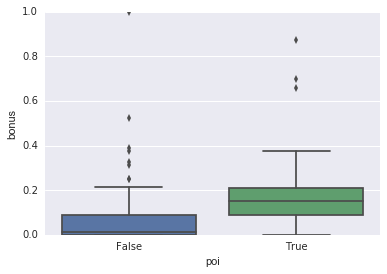

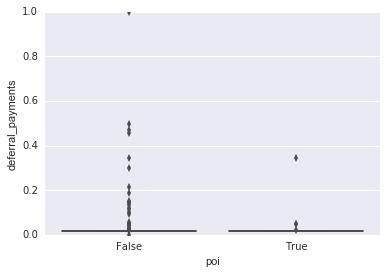

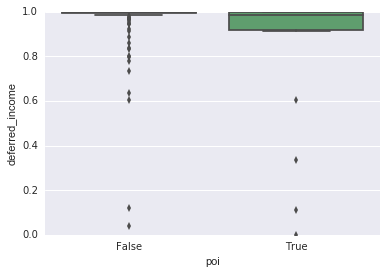

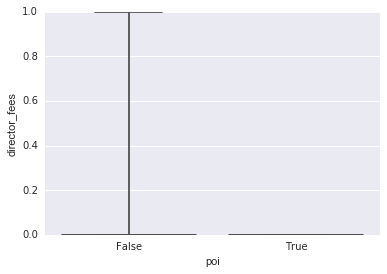

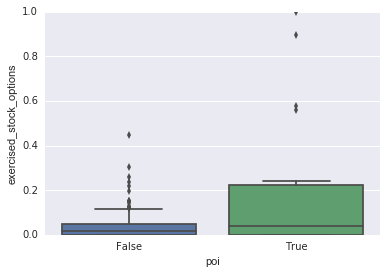

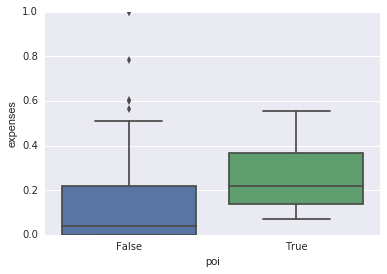

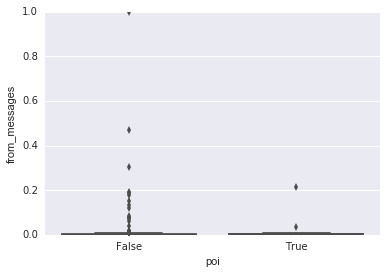

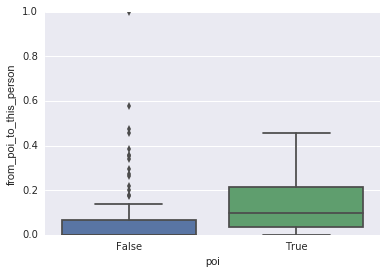

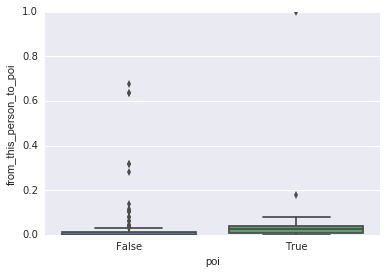

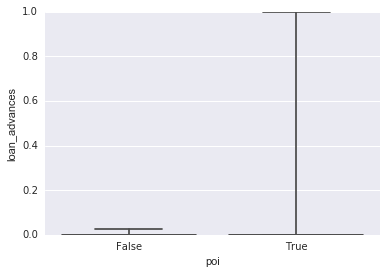

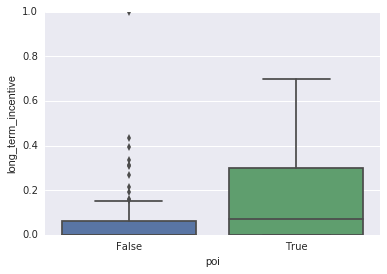

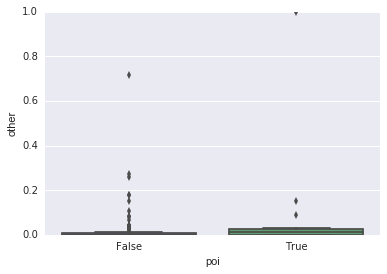

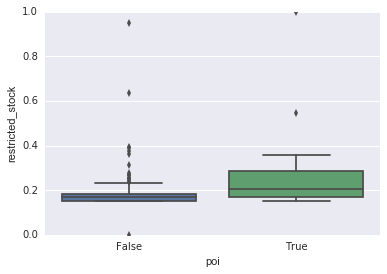

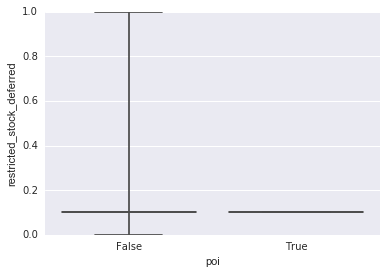

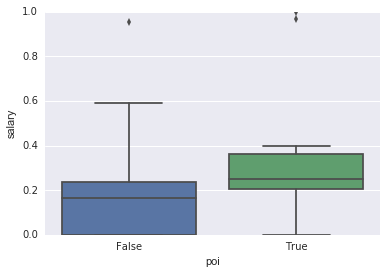

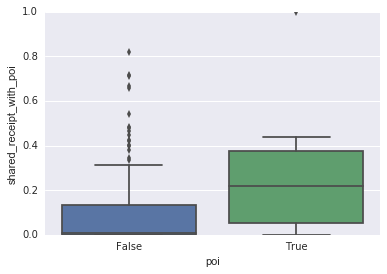

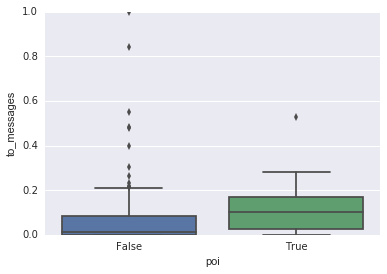

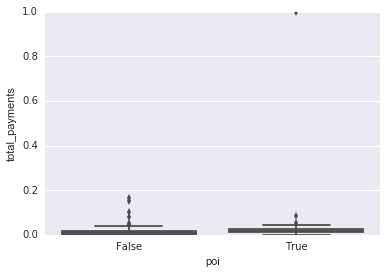

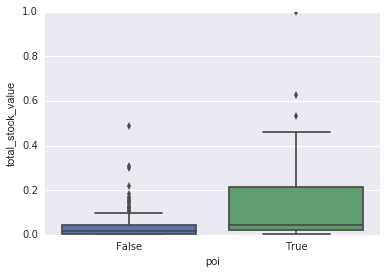

In [273]:
for column in enron_df_converted.columns.values:
    if column not in non_number_columns:
        #sns.boxplot(enron_df_converted[column])
        #sns.title(column)
        sns.boxplot(x = 'poi', y = column, data = enron_df_norm)
        plt.show()

In [278]:
enron_df_converted['ratio_bonus_salary'] = (enron_df_converted['bonus'] / enron_df_converted['salary']).fillna(0)
enron_df_converted[enron_df_converted['ratio_bonus_salary'] > 5][['ratio_bonus_salary', 'poi']]

,ratio_bonus_salary,poi
ALLEN PHILLIP K,20.672922,False
BELDEN TIMOTHY N,24.532820,True
CALGER CHRISTOPHER F,5.204235,True
DELAINEY DAVID W,8.215509,True
FALLON JAMES B,8.207809,False
HANNON KEVIN P,6.165405,True
HICKERSON GARY J,8.026895,False
KITCHEN LOUISE,11.420488,False
LAVORATO JOHN J,23.578789,False
LAY KENNETH L,6.527896,True


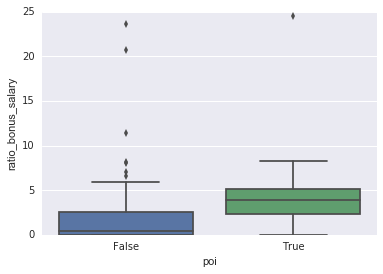

In [279]:
sns.boxplot(x = 'poi', y = 'ratio_bonus_salary', data = enron_df_converted)

In [287]:
enron_df_converted['ratio_from_to'] = (enron_df_converted['from_messages'] / enron_df_converted['to_messages']).fillna(0)
enron_df_converted[enron_df_converted['ratio_from_to'] > 0.5][['ratio_from_to', 'poi']]

,ratio_from_to,poi
ALLEN PHILLIP K,0.756375,False
BECK SALLY W,0.593712,False
DELAINEY DAVID W,0.992241,True
KAMINSKI WINCENTY J,3.118732,False
KEAN STEVEN J,0.529951,False
MCCONNELL MICHAEL S,0.823671,False
SHANKMAN JEFFREY A,0.832350,False


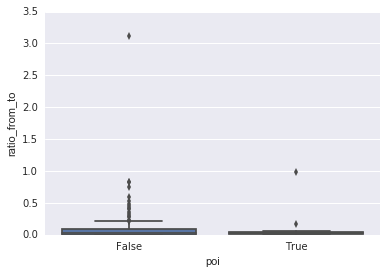

In [285]:
sns.boxplot(x = 'poi', y = 'ratio_from_to', data = enron_df_converted)

In [290]:
enron_df_converted['ratio_total_salary'] = (enron_df_converted['total_payments'] / enron_df_converted['salary']).fillna(0).replace(np.inf, 0)
enron_df_converted[enron_df_converted['ratio_total_salary'] > 5][['ratio_total_salary', 'poi']]

,ratio_total_salary,poi
ALLEN PHILLIP K,22.205155,False
BANNANTINE JAMES M,1920.748428,False
BAXTER JOHN C,21.094350,False
BAZELIDES PHILIP J,10.642877,False
BELDEN TIMOTHY N,25.708672,True
BIBI PHILIPPE A,9.584988,False
BLACHMAN JEREMY M,8.106487,False
BOWEN JR RAYMOND M,9.582123,True
BUY RICHARD B,7.126699,False
CALGER CHRISTOPHER F,6.825029,True


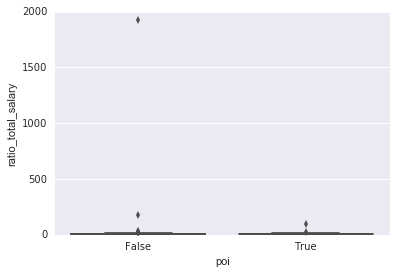

In [291]:
sns.boxplot(x = 'poi', y = 'ratio_total_salary', data = enron_df_converted)

In [297]:
range(0,5,2)

[0, 2, 4]

In [300]:
enron_df_converted[enron_df_converted['exercised_stock_options'] > 5000000][['exercised_stock_options','poi']]

,exercised_stock_options,poi
BAXTER JOHN C,6680544.0,False
CHRISTODOULOU DIOMEDES,5127155.0,False
DERRICK JR. JAMES V,8831913.0,False
DIMICHELE RICHARD G,8191755.0,False
FREVERT MARK A,10433518.0,False
HANNON KEVIN P,5538001.0,True
HIRKO JOSEPH,30766064.0,True
HORTON STANLEY C,5210569.0,False
LAY KENNETH L,34348384.0,True
OVERDYKE JR JERE C,5266578.0,False
